# RGB Color Model and Histograms
  
### Objectives
1. Generate pure RGB colors programmatically
2. Verify additive color mixing (R+G=Yellow, etc.)
3. Separate and visualize color channels from real images
4. Analyze color distribution using histograms

### Theory
The RGB color model is an **additive color model** where colors are created by combining Red, Green, and Blue light:
- **Red (255, 0, 0)** + **Green (0, 255, 0)** = **Yellow (255, 255, 0)**
- **Green (0, 255, 0)** + **Blue (0, 0, 255)** = **Cyan (0, 255, 255)**
- **Red (255, 0, 0)** + **Blue (0, 0, 255)** = **Magenta (255, 0, 255)**
- **Red + Green + Blue** = **White (255, 255, 255)**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

sys.path.append(os.path.abspath('../../'))

from src.color_utils import generate_pure_color, bgr_to_rgb
from src.visualization import show_image, compare_results, plot_histogram
from src.image_processing import segment_color 

%matplotlib inline

✓ Environment Ready!


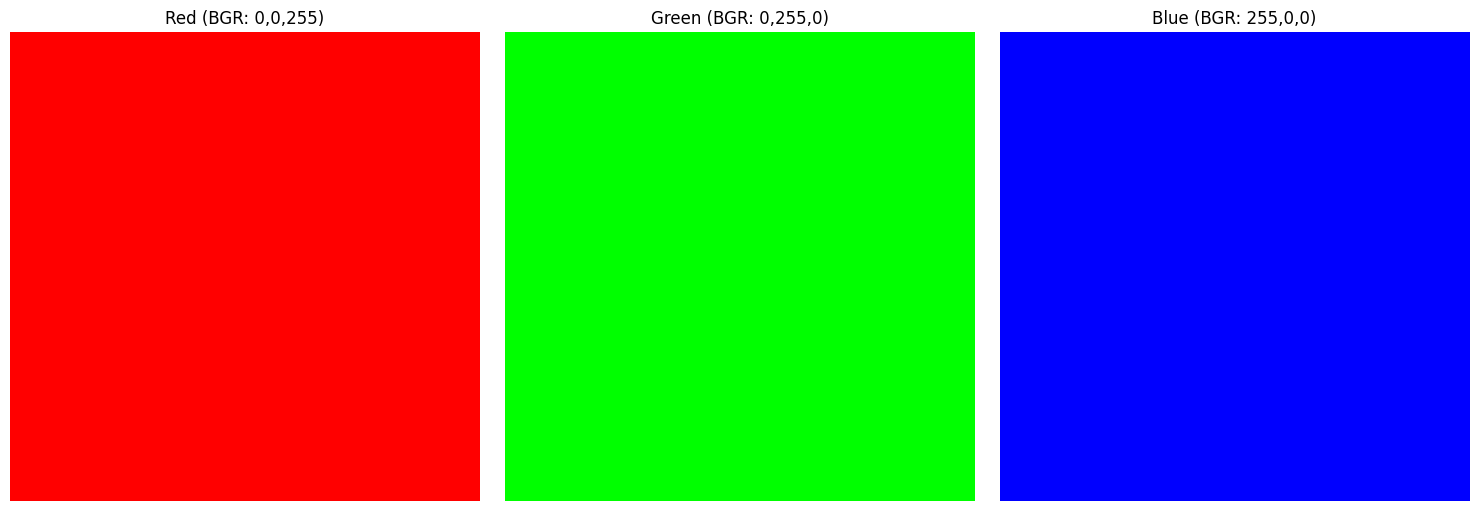

Red BGR Value: [  0   0 255] - ✓
Green BGR Value: [  0 255   0] - ✓
Blue BGR Value: [255   0   0] - ✓


In [ ]:
red = generate_pure_color('red')
green = generate_pure_color('green')
blue = generate_pure_color('blue')

compare_results([red, green, blue], ["Red", "Green", "Blue"])

print(f"Red BGR: {red[0,0]}")
print(f"Green BGR: {green[0,0]}")
print(f"Blue BGR: {blue[0,0]}")

## Generating Pure Colors
We create synthetic color patches to verify RGB fundamentals and test the color generation utilities.

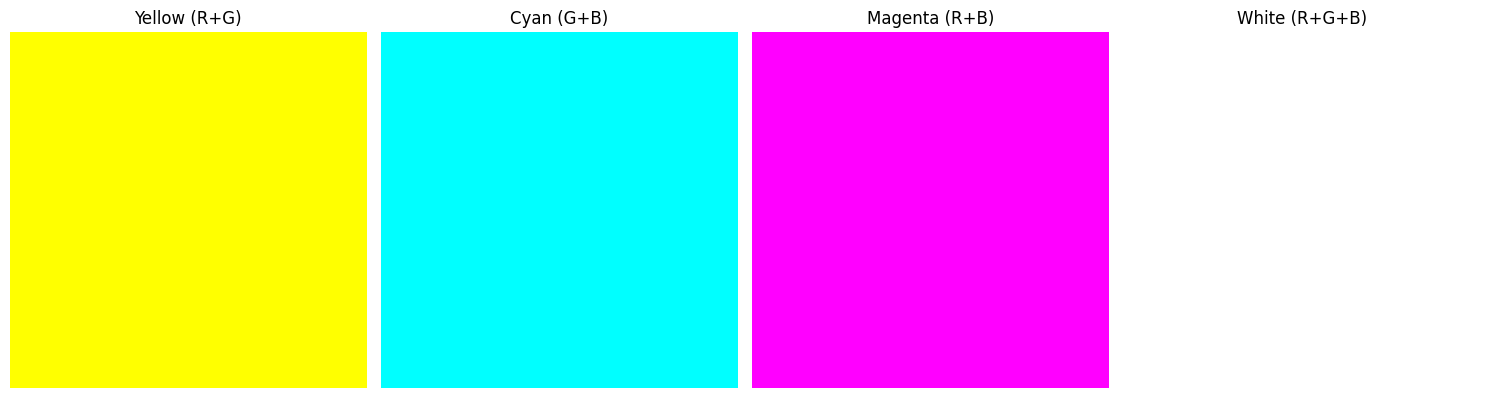

Yellow (BGR: 0,255,255): [  0 255 255] - ✓


In [ ]:
yellow = cv2.add(red, green)
cyan = cv2.add(green, blue)
magenta = cv2.add(red, blue)
white = cv2.add(yellow, blue)

compare_results([yellow, cyan, magenta, white], 
                ["Yellow (R+G)", "Cyan (G+B)", "Magenta (R+B)", "White (R+G+B)"])

print(f"Yellow BGR: {yellow[0,0]}")

## Additive Color Mixing
Testing additive synthesis by combining primaries to produce secondary colors (yellow, cyan, magenta) and white.

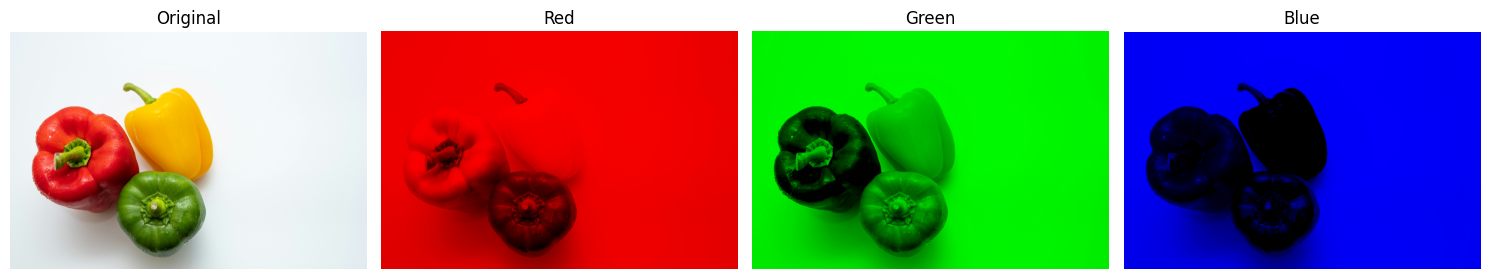

In [ ]:
img = cv2.imread('../../images/input/peppers.jpg')

if img is not None:
    b, g, r = cv2.split(img)
    
    r_vis = np.zeros_like(img); r_vis[:,:,2] = r
    g_vis = np.zeros_like(img); g_vis[:,:,1] = g
    b_vis = np.zeros_like(img); b_vis[:,:,0] = b
    
    compare_results([img, r_vis, g_vis, b_vis], ["Original", "Red", "Green", "Blue"])
else:
    print("Image file not found")

## Channel Separation
Extracting individual RGB channels from a real image to observe how each channel contributes to the overall appearance.

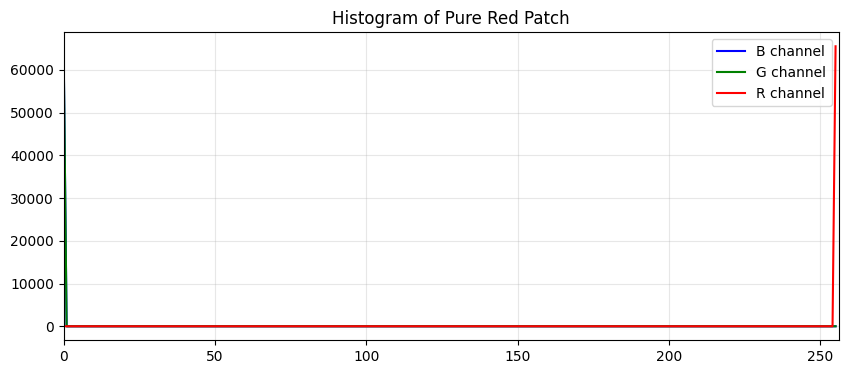

In [ ]:
plot_histogram(red, title="Histogram of Pure Red Patch")

## Histogram Analysis
Inspecting intensity distributions to understand color composition and luminance patterns.

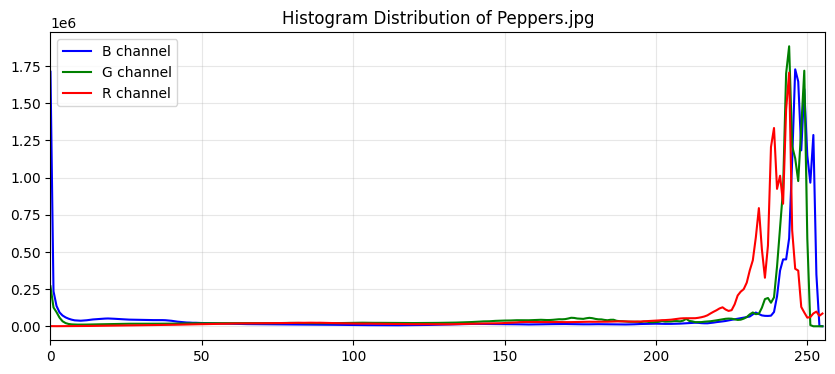

Blue Channel Mean: 187.78
Green Channel Mean: 205.26
Red Channel Mean: 217.45


In [ ]:
plot_histogram(img, title="Histogram Distribution of Peppers.jpg")

for i, label in enumerate(['Blue', 'Green', 'Red']):
    print(f"{label} Channel Mean: {img[:,:,i].mean():.2f}")